In [1]:
set.seed(2000)
library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip", temp)
pulsar_file <- unz(temp, "HTRU_2.csv")
pulsar <- read_csv(pulsar_file, col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



In [3]:
colnames(pulsar) <- c("mean_ip", "std_ip", "kurt_ip", "skew_ip", "mean_dm_snr", "std_dm_snr", "kurt_dm_snr", "skew_dm_snr", "class")

pulsar_mutate <- pulsar %>%
                mutate(class = as_factor(class))
pulsar_mutate

mean_ip,std_ip,kurt_ip,skew_ip,mean_dm_snr,std_dm_snr,kurt_dm_snr,skew_dm_snr,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


In [4]:
# average of each column containing dbl values
pulsar_with_column_means <- pulsar %>%
                select(mean_ip:skew_dm_snr) %>%
                map_df(mean)
pulsar_with_column_means

mean_ip,std_ip,kurt_ip,skew_ip,mean_dm_snr,std_dm_snr,kurt_dm_snr,skew_dm_snr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111.08,46.54953,0.4778573,1.770279,12.6144,26.32651,8.303556,104.8577


In [5]:
pulsar_split <- initial_split(pulsar_mutate, prop = 0.75, strata = class)
pulsar_train <- training(pulsar_split) 
pulsar_test <- testing(pulsar_split)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



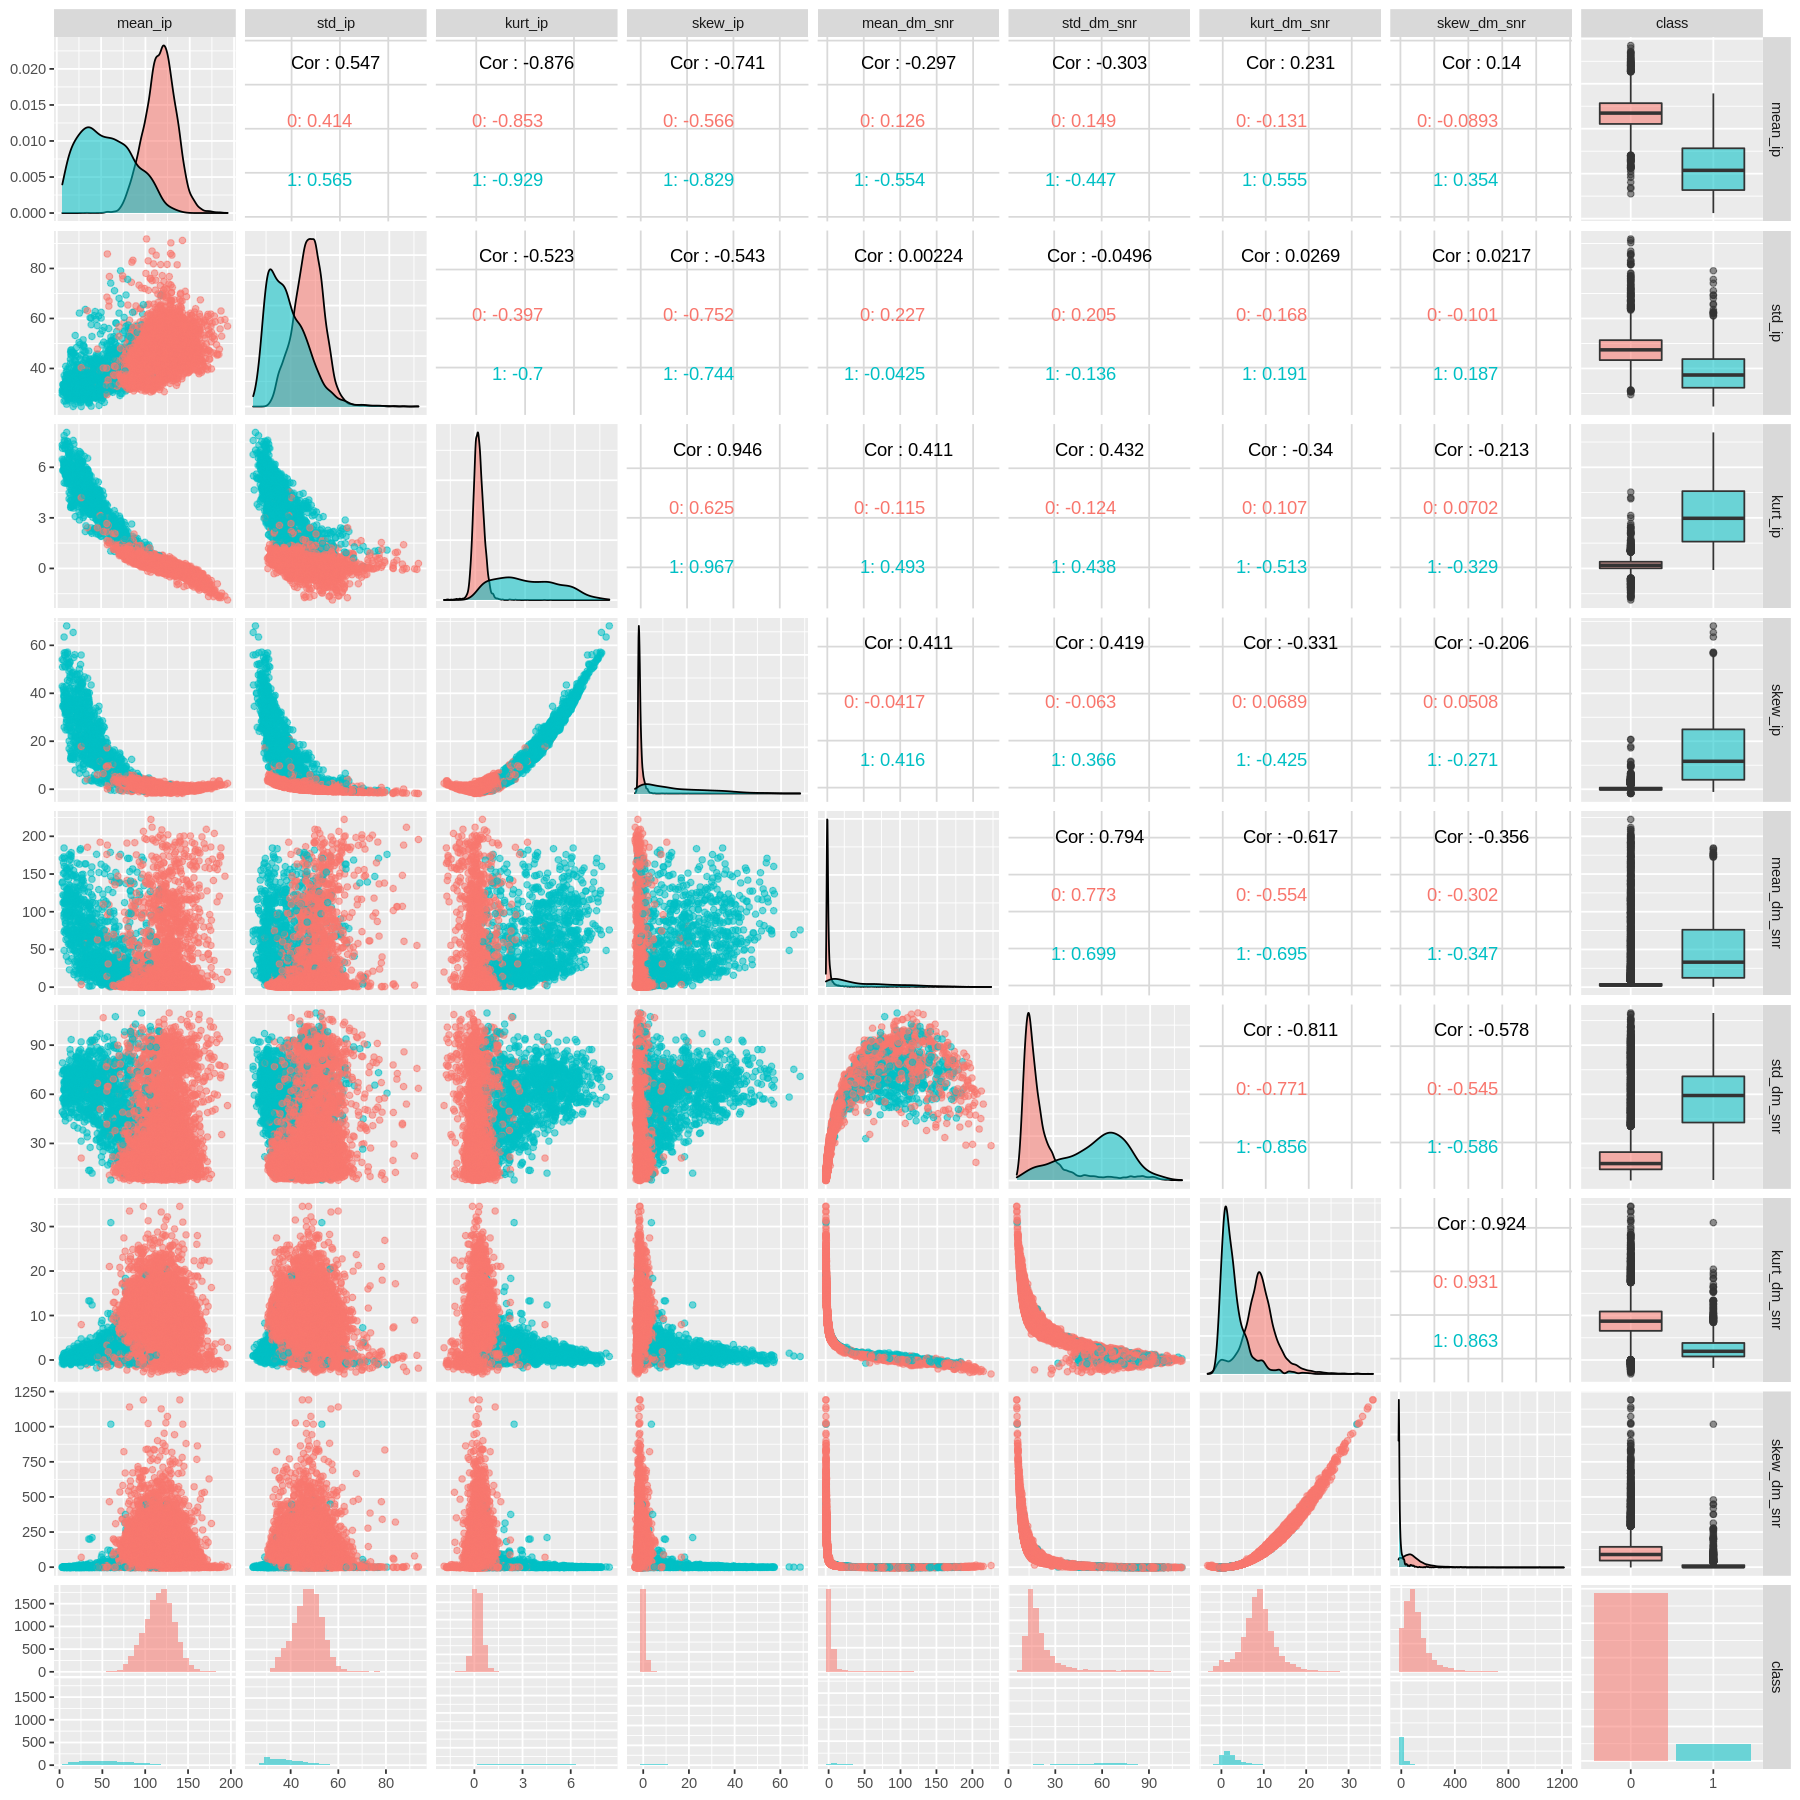

In [6]:
options(repr.plot.height = 15, repr.plot.width = 15)
correlation <- ggpairs(pulsar_train, mapping = aes(color = class, alpha = 0.5))
correlation
# options(repr.plot.height = 10, repr.plot.width = 10)
### all predictor variables can be used because there seems to be a cut off for each variable regarding the areas that factor 0 and 1 take up more or less 

In [7]:
pulsar_train_scaled <- pulsar_train %>% 
 mutate(mean_ip = scale(mean_ip, center = TRUE), 
        std_ip = scale(std_ip, center = TRUE), 
        kurt_ip = scale(kurt_ip, center = TRUE), 
        skew_ip = scale(skew_ip, center = TRUE), 
        mean_dm_snr = scale(mean_dm_snr, center = TRUE), 
        std_dm_snr = scale(std_dm_snr, center = TRUE), 
        kurt_dm_snr = scale(kurt_dm_snr, center = TRUE), 
        skew_dm_snr = scale(skew_dm_snr, center = TRUE))
pulsar_train_scaled

mean_ip,std_ip,kurt_ip,skew_ip,mean_dm_snr,std_dm_snr,kurt_dm_snr,skew_dm_snr,class
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.1417891,1.337348,-0.667846,-0.4040470,-0.3222267,-0.3767276,-0.0630455,-0.2808458,0
-0.3095702,-1.044136,-0.148401,-0.1218312,-0.3248851,-0.2418872,-0.1163356,-0.3855318,0
0.9944184,1.555161,-0.513142,-0.3938258,-0.3072380,-0.2820893,-0.3029264,-0.4761081,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.4457044,0.4341085,-0.3302862,-0.2391952,0.1245798,0.9293977,-1.181334,-0.9044531,0
0.3212849,1.9570008,-0.3010645,-0.4110390,0.2944053,1.6585698,-1.280424,-0.9394601,0
-2.0858697,5.7256964,0.8600086,-0.2768400,5.9387487,1.9575338,-2.191242,-0.9693964,0


In [8]:
sum(is.na(pulsar_train)) #checking for missing values in training data 

[1] 0

In [9]:
#pulsar observation counts with 0's and 1's
count_train_pulsar <- pulsar_train %>%
    group_by(class) %>%
    summarize(n = n())
count_train_pulsar

`summarise()` ungrouping output (override with `.groups` argument)



class,n
<fct>,<int>
0,12169
1,1255


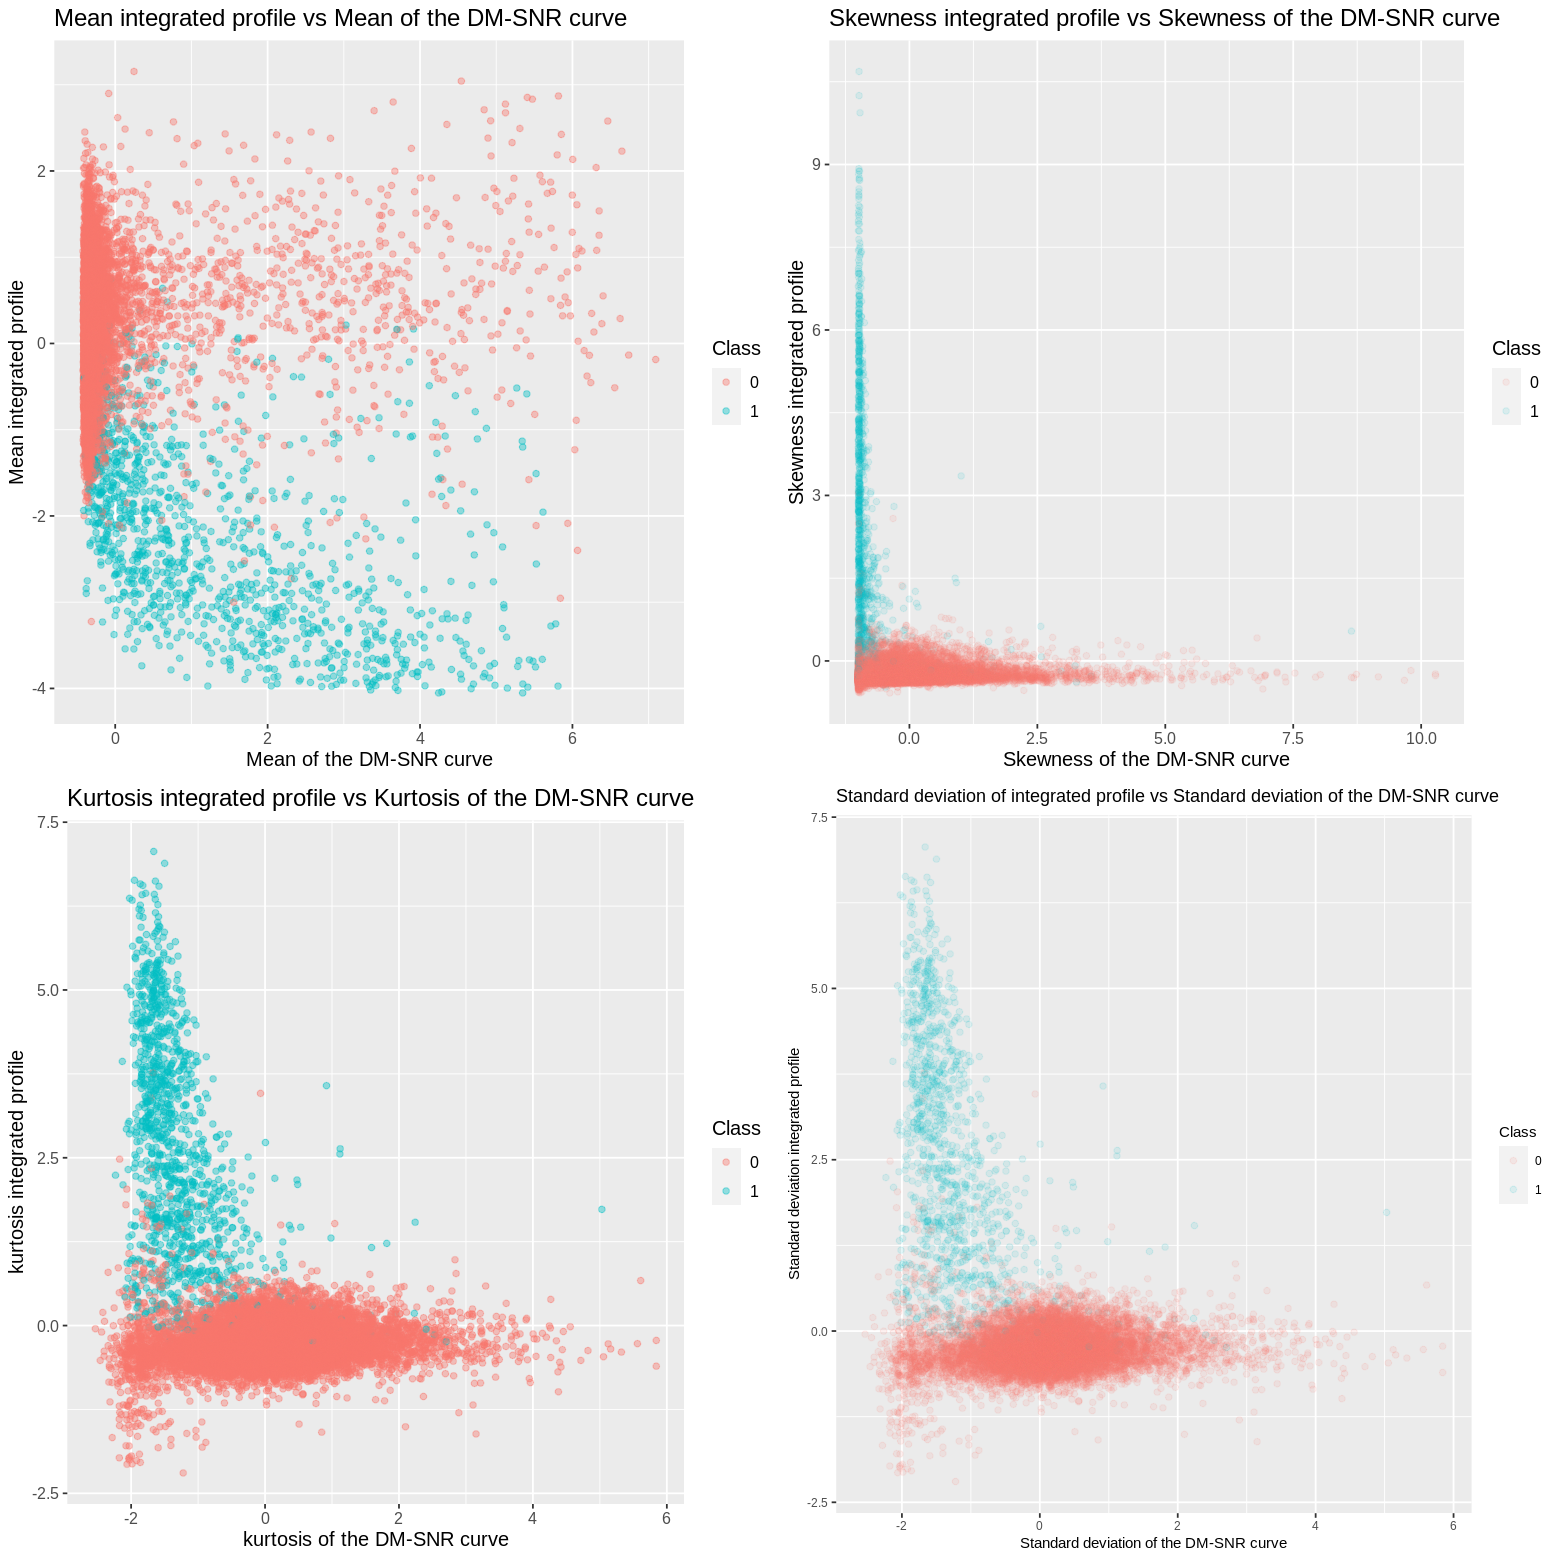

In [10]:
options(repr.plot.width = 13, repr.plot.height = 13)

plot_mean_ip_dmsnr <- ggplot(pulsar_train_scaled, aes(x = mean_dm_snr, y =mean_ip , color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the DM-SNR curve", y = "Mean integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Mean integrated profile vs Mean of the DM-SNR curve") 

plot_skew_ip_dmsnr <- ggplot(pulsar_train_scaled, aes(x = skew_dm_snr, y= skew_ip , color = class)) +
                geom_point(alpha = 0.1) +
                labs(x = "Skewness of the DM-SNR curve", y = "Skewness integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Skewness integrated profile vs Skewness of the DM-SNR curve") 

plot_kurt_ip_dmsnr <- ggplot(pulsar_train_scaled, aes(x = kurt_dm_snr, y= kurt_ip , color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "kurtosis of the DM-SNR curve", y = "kurtosis integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Kurtosis integrated profile vs Kurtosis of the DM-SNR curve") 

plot_std_ip_dmsnr <- ggplot(pulsar_train_scaled, aes(x = kurt_dm_snr, y= kurt_ip , color = class)) +
                geom_point(alpha = 0.1) +
                labs(x = "Standard deviation of the DM-SNR curve", y = "Standard deviation integrated profile", color = "Class") +
                theme(text = element_text(size = 9)) +
                ggtitle("Standard deviation of integrated profile vs Standard deviation of the DM-SNR curve") 

plot_grid(plot_mean_ip_dmsnr, plot_skew_ip_dmsnr, plot_kurt_ip_dmsnr, plot_std_ip_dmsnr, ncol = 2, nrow = 2)

In [11]:
###SCALED PLOTS ABOVE 

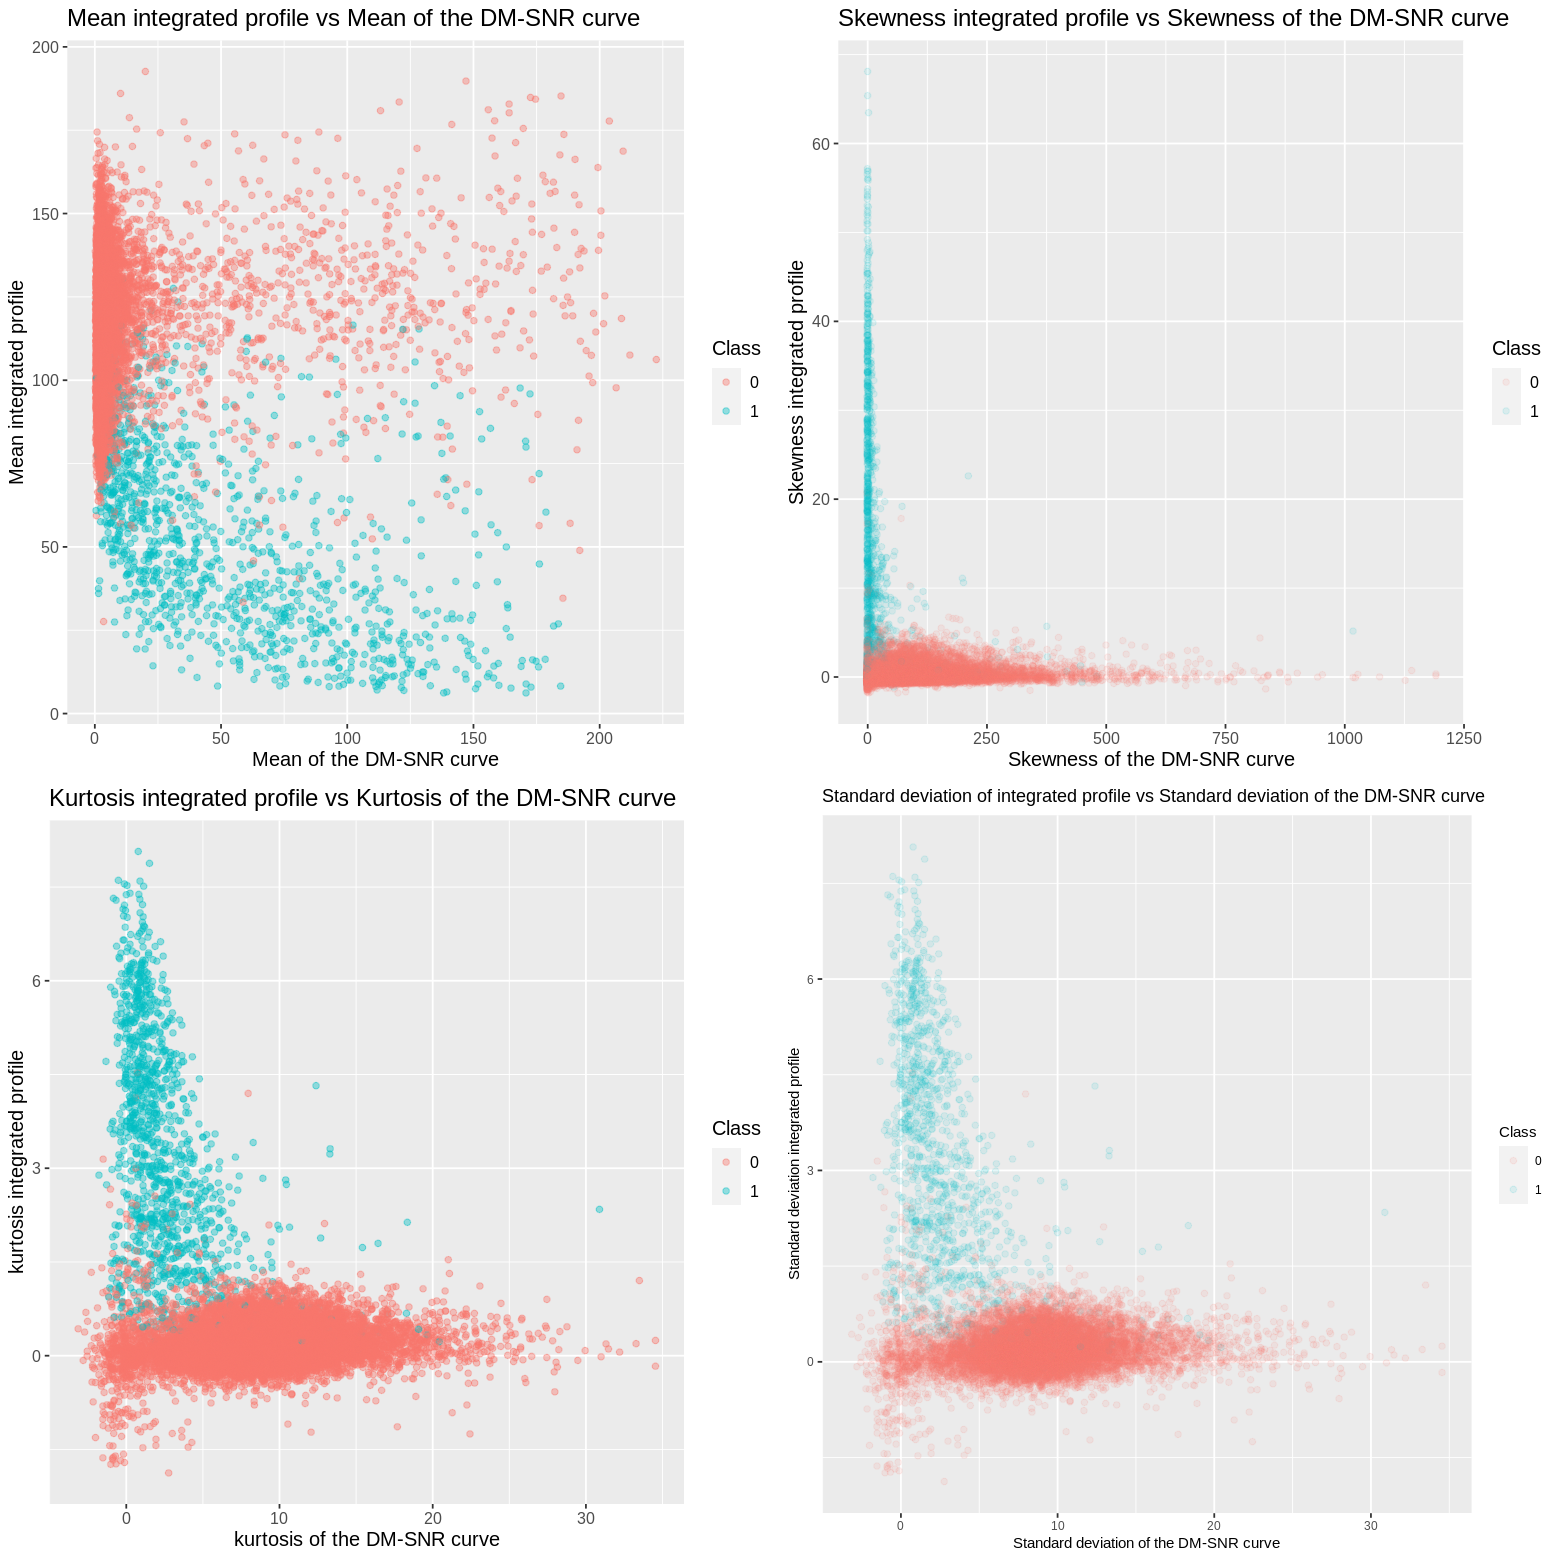

In [12]:
options(repr.plot.width = 13, repr.plot.height = 13)

plot_mean_ip_dmsnr <- ggplot(pulsar_train, aes(x = mean_dm_snr, y =mean_ip , color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the DM-SNR curve", y = "Mean integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Mean integrated profile vs Mean of the DM-SNR curve") 

plot_skew_ip_dmsnr <- ggplot(pulsar_train, aes(x = skew_dm_snr, y= skew_ip , color = class)) +
                geom_point(alpha = 0.1) +
                labs(x = "Skewness of the DM-SNR curve", y = "Skewness integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Skewness integrated profile vs Skewness of the DM-SNR curve") 

plot_kurt_ip_dmsnr <- ggplot(pulsar_train, aes(x = kurt_dm_snr, y= kurt_ip , color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "kurtosis of the DM-SNR curve", y = "kurtosis integrated profile", color = "Class") +
                theme(text = element_text(size = 12)) +
                ggtitle("Kurtosis integrated profile vs Kurtosis of the DM-SNR curve") 

plot_std_ip_dmsnr <- ggplot(pulsar_train, aes(x = kurt_dm_snr, y= kurt_ip , color = class)) +
                geom_point(alpha = 0.1) +
                labs(x = "Standard deviation of the DM-SNR curve", y = "Standard deviation integrated profile", color = "Class") +
                theme(text = element_text(size = 9)) +
                ggtitle("Standard deviation of integrated profile vs Standard deviation of the DM-SNR curve") 

plot_grid(plot_mean_ip_dmsnr, plot_skew_ip_dmsnr, plot_kurt_ip_dmsnr, plot_std_ip_dmsnr, ncol = 2, nrow = 2)

In [13]:
###UNSCALED PLOTS ABOVE

In [14]:
### start data analysis = look for K 

In [25]:
# ACCOUNTING FOR ALL 8 PREDICTOR VARIABLES 
# RECIPE USES TRAINING DATA 
pulsar_recipe <- recipe(class ~. , data = pulsar_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

# MODEL SPEC TO DETERMINE K 
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>% 
  set_engine("kknn") %>%
  set_mode("classification")

# USING CROSS-VALIDATION TO HELP US DETERMINE K 
# CHOSE V = 5 INSTEAD OF V=10 TO REDUCE RUN TIME 
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = class)


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9713948,5,0.001802304,Model01
2,accuracy,binary,0.9713948,5,0.001802304,Model02
3,accuracy,binary,0.9780244,5,0.001348006,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.9786203,5,0.001096379,Model08
9,accuracy,binary,0.9785460,5,0.001533559,Model09
10,accuracy,binary,0.9785460,5,0.001533559,Model10


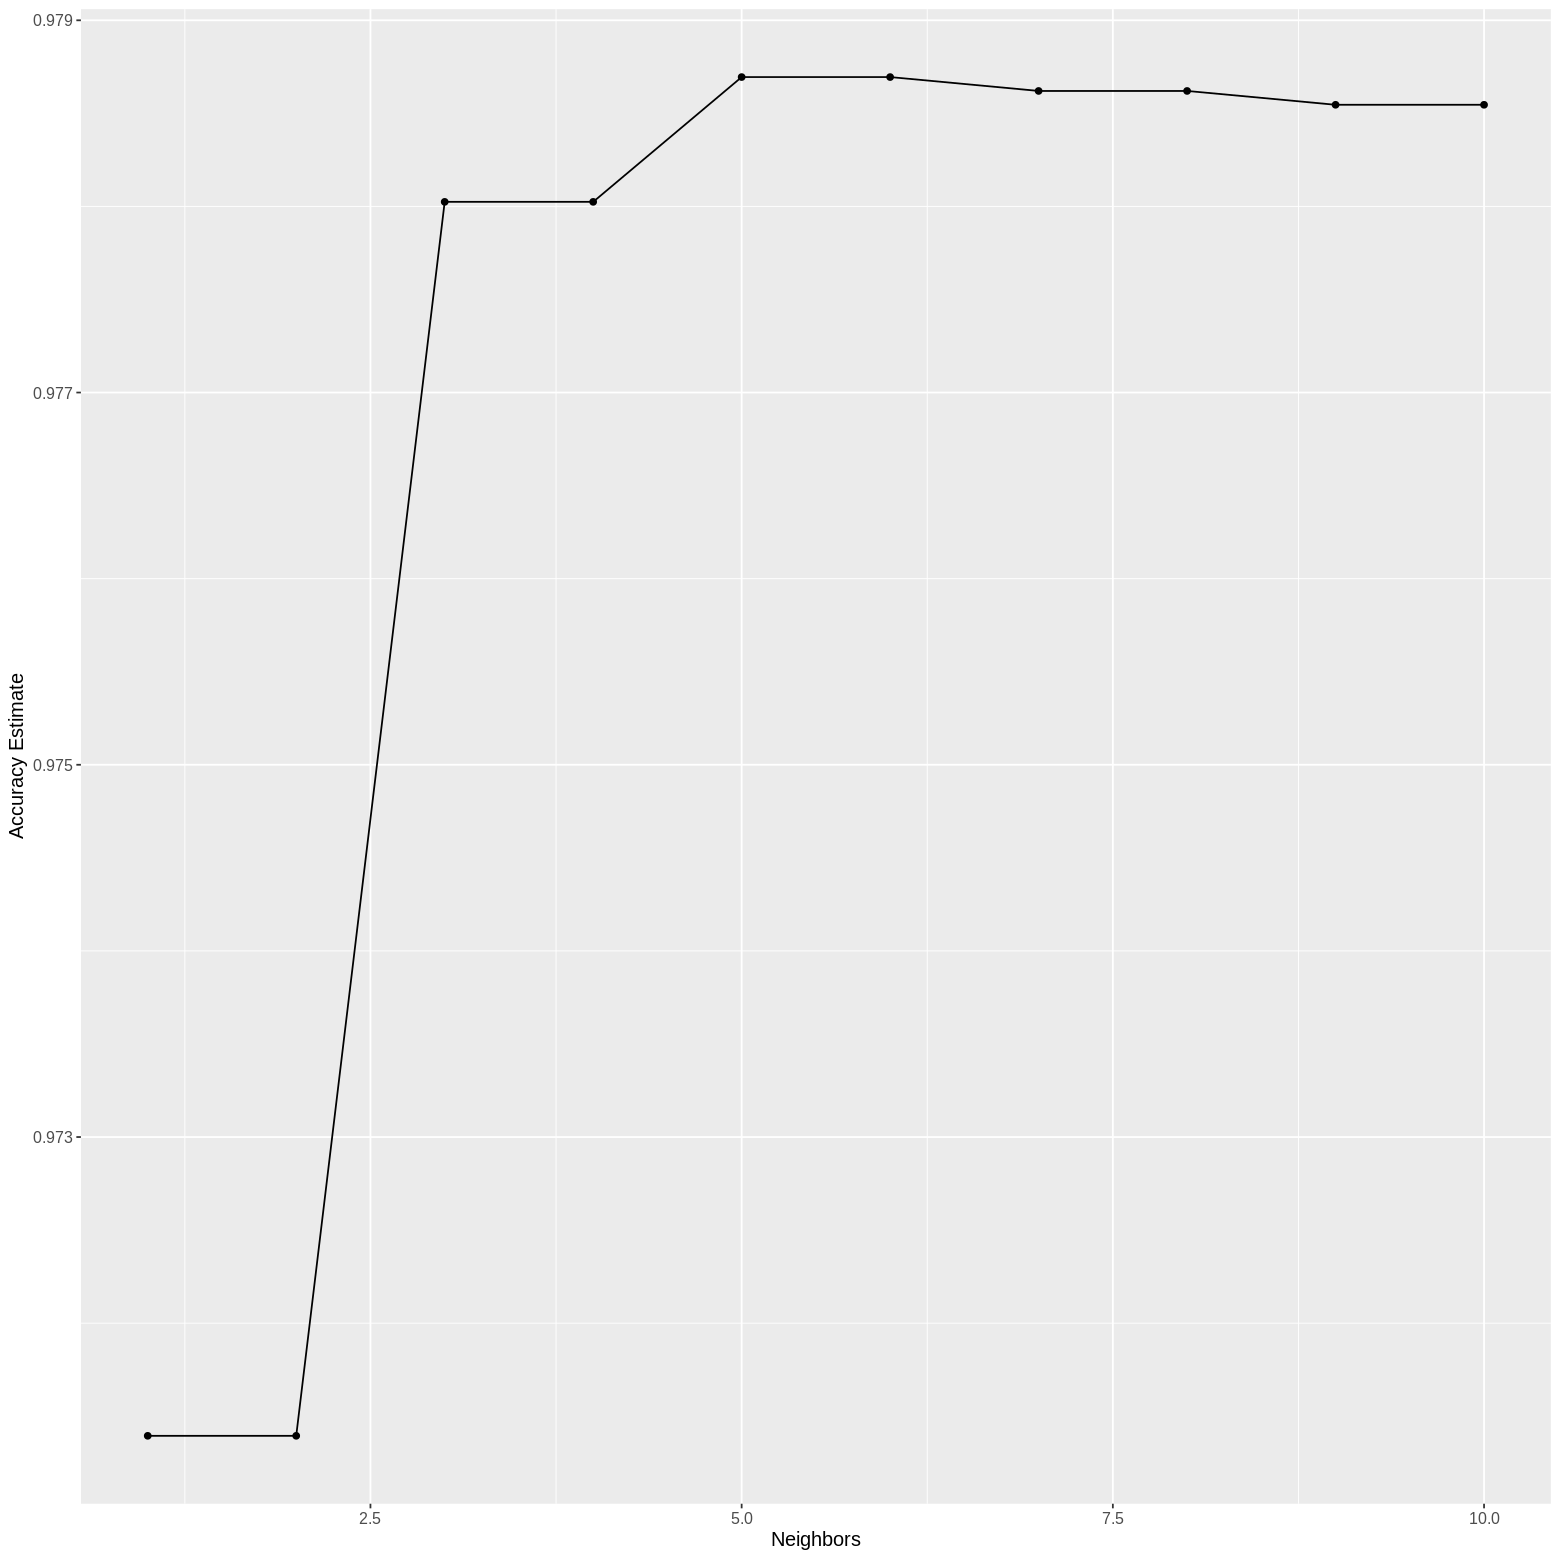

In [27]:
# WE ARE LOOKING AT K VALUES BETWEEN 1-15 
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# GETTING RESULTS FOR THE RECIPE, MODEL SPEC, AND CROSS-VALIDATION FROM ABOVE 
pulsar_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>% # recipe
  add_model(pulsar_spec) %>% # model spec with tune()
  tune_grid(resamples = pulsar_vfold, grid = k_vals) %>%
  collect_metrics() 

# GETTING ACCURACIES SO WE CAN PLOT AN ACCURACY VS K PLOT TO DETERMINE OUR IDEAL K 
accuracies <- pulsar_results %>%
  filter(.metric == "accuracy")

accuracies

# PLOTTING ACCURACY VS K 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k


In [29]:
accuracy_for_7 <- accuracies %>%
        filter(neighbors == 7)
accuracy_for_7

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.9786203,5,0.001096379,Model07


In [28]:
pulsar_final_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 7) %>% 
  set_engine("kknn") %>%
  set_mode("classification")
                                      
pulsar_final_fit <- workflow() %>%
    add_recipe(pulsar_recipe) %>% 
    add_model(pulsar_final_spec) %>% 
    fit(data = pulsar_train)
                                      
prediction <- predict(pulsar_final_fit, pulsar_test) %>%
      bind_cols(pulsar_test)

prediction

test_set_accuracy <- prediction %>% # predictions object  
  metrics(truth = class, estimate = .pred_class) %>% # cat. variable
  filter(.metric == "accuracy") %>% # gives estimated accuracy %
  select(.estimate) %>% # for returning of only one value
  pull() # return only one value 

test_set_accuracy
                                      

.pred_class,mean_ip,std_ip,kurt_ip,skew_ip,mean_dm_snr,std_dm_snr,kurt_dm_snr,skew_dm_snr,class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,102.5078,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
0,119.4844,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
0,142.0781,45.28807,-0.32032843,0.2839525,5.3762542,29.009897,6.076266,37.83139,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,126.6250,55.72183,0.002946216,-0.30321814,0.5342809,8.588882,23.913761,660.1970,0
0,96.0000,44.19311,0.388673964,0.28134362,1.8712375,15.833746,9.634927,104.8216,0
0,114.5078,53.90240,0.201161383,-0.02478884,1.9464883,13.381731,10.007967,134.2389,0


[1] 0.9778722